In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('../data/curated/future_rent_prediction.csv')

In [129]:
df.head()

,Unnamed: 0,Date,Predicted_Median,suburb,type
0,2023-01-01,2023-04-01,288.520734,Altona,1 bedroom flat
1,2023-04-01,2023-07-01,288.815730,Altona,1 bedroom flat
2,2023-07-01,2023-10-01,289.621039,Altona,1 bedroom flat
3,2023-10-01,2024-01-01,290.155124,Altona,1 bedroom flat
4,2024-01-01,2024-04-01,290.237235,Altona,1 bedroom flat


In [130]:
df = df.sort_values(['suburb', 'type', 'Date'])

In [131]:
result = df.groupby(['suburb', 'type']).apply(
    lambda x: ((x['Predicted_Median'].iloc[-1] - x['Predicted_Median'].iloc[0]) / x['Predicted_Median'].iloc[0]) * 100
)

# Convert result to DataFrame for readability
result = result.reset_index(name='Rent_Diff')

print(result)

      suburb             type  Rent_Diff
0     Altona   1 bedroom flat   0.319189
1     Altona   2 bedroom flat   7.099991
2     Altona  2 bedroom house   1.857357
3     Altona   3 bedroom flat   0.768537
4     Altona  3 bedroom house   9.516288
..       ...              ...        ...
306  Wodonga  2 bedroom house  -2.393657
307  Wodonga   3 bedroom flat   2.489009
308  Wodonga  3 bedroom house   9.052337
309  Wodonga  4 bedroom house   9.774498
310  Wodonga   All properties   5.768533

[311 rows x 3 columns]


/var/folders/_7/sr3p02zn35v2xg1fm8dsbz6c0000gn/T/ipykernel_11743/3410902719.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['suburb', 'type']).apply(


In [132]:
# Find the top 10 suburb with the highest increase in rent
result.nlargest(10, 'Rent_Diff')

,suburb,type,Rent_Diff
193,Morwell,3 bedroom house,23.283171
102,Cranbourne,4 bedroom house,21.161082
68,Boronia,All properties,16.461449
103,Cranbourne,All properties,14.963893
151,Frankston,2 bedroom house,14.300542
101,Cranbourne,3 bedroom house,13.618691
128,Elwood,1 bedroom flat,12.827867
234,Springvale,All properties,12.472059
232,Springvale,3 bedroom house,11.571624
216,Seymour,2 bedroom flat,11.351213


In [133]:
# Find the top 10 suburb with the lowest increase in rent
result.nsmallest(10, 'Rent_Diff')

,suburb,type,Rent_Diff
182,Melton,1 bedroom flat,-8.716571
275,Toorak,4 bedroom house,-8.272183
12,Armadale,4 bedroom house,-8.064268
272,Toorak,2 bedroom house,-7.771360
113,East Melbourne,4 bedroom house,-6.607086
110,East Melbourne,2 bedroom house,-6.081887
104,Docklands,1 bedroom flat,-6.002398
168,Lara,1 bedroom flat,-5.880811
155,Horsham,1 bedroom flat,-5.161314
105,Docklands,2 bedroom flat,-4.993948


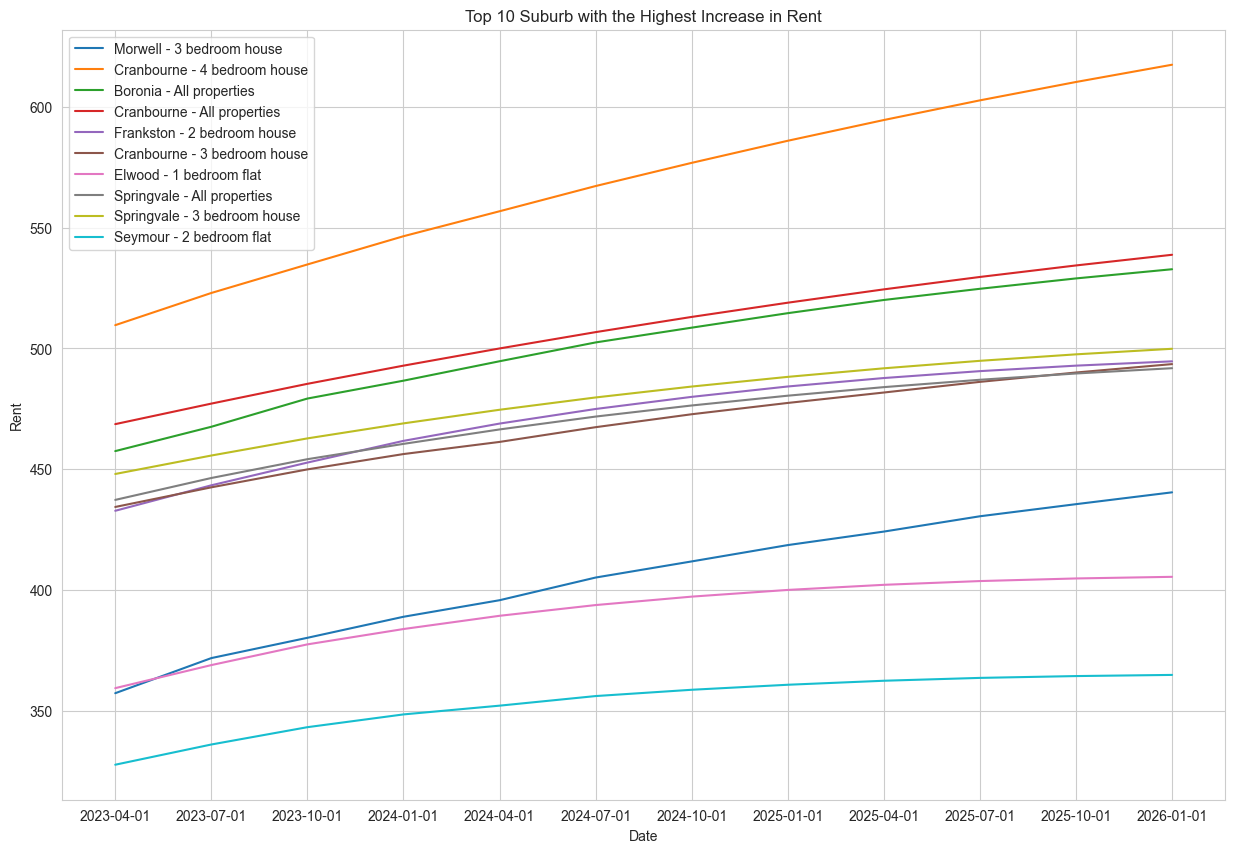

In [134]:
# Plot the rent over time for the top 10 suburb with the highest increase in rent
top_10 = result.nlargest(10, 'Rent_Diff')
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(10):
    suburb = top_10.iloc[i]['suburb']
    type = top_10.iloc[i]['type']
    df_temp = df[(df['suburb'] == suburb) & (df['type'] == type)]
    ax.plot(df_temp['Date'], df_temp['Predicted_Median'], label=f'{suburb} - {type}')
    
ax.set_title('Top 10 Suburb with the Highest Increase in Rent')
ax.set_xlabel('Date')
ax.set_ylabel('Rent')
ax.legend()
plt.show()